In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ccxt
import datetime
import time
#from plotly.offline import iplot
#import plotly as py
import plotly.graph_objs as go
import plotly.express as px

In [12]:
#Creamos 22 dataframes de los 22 csvs para poder trabajar con ellos
AAVE = pd.read_csv('../data/AAVE-USD.csv')
BNB = pd.read_csv('../data/BNB-USD.csv')
BTC = pd.read_csv('../data/BTC-USD.csv')
ADA = pd.read_csv('../data/ADA-USD.csv')
LINK = pd.read_csv('../data/LINK-USD.csv')
ATOM = pd.read_csv('../data/ATOM-USD.csv')
CRO = pd.read_csv('../data/CRO-USD.csv')
DOGE = pd.read_csv('../data/DOGE-USD.csv')
EOS = pd.read_csv('../data/EOS-USD.csv')
ETH = pd.read_csv('../data/ETH-USD.csv')
MIOTA = pd.read_csv('../data/MIOTA-USD.csv')
LTC = pd.read_csv('../data/LTC-USD.csv')
XMR = pd.read_csv('../data/XMR-USD.csv')
XEM = pd.read_csv('../data/XEM-USD.csv')
DOT = pd.read_csv('../data/DOT-USD.csv')
SOL = pd.read_csv('../data/SOL-USD.csv')
XLM = pd.read_csv('../data/XLM-USD.csv')
USDT = pd.read_csv('../data/USDT-USD.csv')
TRX = pd.read_csv('../data/TRX-USD.csv')
UNI = pd.read_csv('../data/UNI-USD.csv')
USDC = pd.read_csv('../data/USDC-USD.csv')
XRP = pd.read_csv('../data/XRP-USD.csv')

In [13]:
#Creamos 2 variables, la segunda con 3 dataframes menos 
all_cryptos = pd.concat([AAVE,BNB,BTC,ADA,LINK,ATOM,CRO,DOGE,EOS,ETH,MIOTA,LTC,XMR,XEM,DOT,SOL,XLM,USDT,TRX,UNI,USDC,XRP], ignore_index=True)
all_cryptos_except = pd.concat([AAVE,BNB,ADA,LINK,ATOM,CRO,DOGE,EOS,MIOTA,XMR,XEM,DOT,SOL,XLM,USDT,TRX,UNI,USDC,XRP], ignore_index=True)

In [14]:
#Redondeamos los datos
all_cryptos['Open'] = all_cryptos['Open'].round(2)
all_cryptos['High'] = all_cryptos['High'].round(2)
all_cryptos['Low'] = all_cryptos['Low'].round(2)
all_cryptos['Close'] = all_cryptos['Close'].round(2)
all_cryptos['Adj Close'] = all_cryptos['Adj Close'].round(2)

all_cryptos_except['Open'] = all_cryptos_except['Open'].round(2)
all_cryptos_except['High'] = all_cryptos_except['High'].round(2)
all_cryptos_except['Low'] = all_cryptos_except['Low'].round(2)
all_cryptos_except['Close'] = all_cryptos_except['Close'].round(2)
all_cryptos_except['Adj Close'] = all_cryptos_except['Adj Close'].round(2)

all_cryptos['Date'] = pd.to_datetime(all_cryptos['Date']) 
all_cryptos_except['Date'] = pd.to_datetime(all_cryptos['Date']) 

In [15]:

fecha_acortada = pd.to_datetime('2020-10-03')

# Filtra el DataFrame para obtener solo las filas dentro del rango de fechas
stack_cryptos = all_cryptos[(all_cryptos['Date'] >= fecha_acortada)]
stack_cryptos

,Name,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
1,Aave USD,AAVE-USD,2020-10-03,0.52,65.31,0.52,53.15,53.15,0
2,Aave USD,AAVE-USD,2020-10-04,53.18,55.07,50.69,52.68,52.68,0
3,Aave USD,AAVE-USD,2020-10-05,52.68,55.11,49.79,53.22,53.22,0
4,Aave USD,AAVE-USD,2020-10-06,53.29,53.40,40.73,42.40,42.40,583091
5,Aave USD,AAVE-USD,2020-10-07,42.40,42.41,35.97,40.08,40.08,682834
...,...,...,...,...,...,...,...,...,...
45256,XRP USD,XRP-USD,2023-10-20,0.52,0.53,0.51,0.52,0.52,1574470400
45257,XRP USD,XRP-USD,2023-10-21,0.52,0.53,0.51,0.52,0.52,685668864
45258,XRP USD,XRP-USD,2023-10-22,0.52,0.52,0.52,0.52,0.52,544090432
45259,XRP USD,XRP-USD,2023-10-23,0.52,0.54,0.52,0.54,0.54,1397369600


In [16]:
#Creamos múltiples variables para añadirlos a un stackplot
"""y1= stack_cryptos[stack_cryptos['Name']=='Aave USD']['Volume']
y2= stack_cryptos[stack_cryptos['Name']=='BNB USD']['Volume']
y2= y2.reset_index(drop=True)
y3= stack_cryptos[stack_cryptos['Name']=='Bitcoin USD']['Volume']
y3= y3.reset_index(drop=True)
y4= stack_cryptos[stack_cryptos['Name']=='Cardano USD']['Volume']
y4= y4.reset_index(drop=True)
y5= stack_cryptos[stack_cryptos['Name']=='Chainlink USD']['Volume']
y5= y5.reset_index(drop=True)
y6= stack_cryptos[stack_cryptos['Name']=='Cosmos USD']['Volume']
y6= y6.reset_index(drop=True)
y7= stack_cryptos[stack_cryptos['Name']=='Cronos USD']['Volume']
y7= y7.reset_index(drop=True)
y8= stack_cryptos[stack_cryptos['Name']=='Dogecoin USD']['Volume']
y8= y8.reset_index(drop=True)
y9= stack_cryptos[stack_cryptos['Name']=='EOS USD']['Volume']
y9= y9.reset_index(drop=True)
y10= stack_cryptos[stack_cryptos['Name']=='Ethereum USD']['Volume']
y10= y10.reset_index(drop=True)
y11= stack_cryptos[stack_cryptos['Name']=='IOTA USD']['Volume']
y11= y11.reset_index(drop=True)
y12= stack_cryptos[stack_cryptos['Name']=='Litecoin USD']['Volume']
y12= y12.reset_index(drop=True)
y13= stack_cryptos[stack_cryptos['Name']=='Monero USD']['Volume']
y13= y13.reset_index(drop=True)
y14= stack_cryptos[stack_cryptos['Name']=='NEM USD']['Volume']
y14= y14.reset_index(drop=True)
y15= stack_cryptos[stack_cryptos['Name']=='Polkadot USD']['Volume']
y15= y15.reset_index(drop=True)
y16= stack_cryptos[stack_cryptos['Name']=='Solana USD']['Volume']
y16= y16.reset_index(drop=True)
y17= stack_cryptos[stack_cryptos['Name']=='Stellar USD']['Volume']
y17= y17.reset_index(drop=True)
y18= stack_cryptos[stack_cryptos['Name']=='Tether USDt USD']['Volume']
y18= y18.reset_index(drop=True)
y19= stack_cryptos[stack_cryptos['Name']=='TRON USD']['Volume']
y19= y19.reset_index(drop=True)
y20= stack_cryptos[stack_cryptos['Name']=='TRON USD']['Volume']
y20= y20.reset_index(drop=True)
y21= stack_cryptos[stack_cryptos['Name']=='USD Coin USD']['Volume']
y21= y21.reset_index(drop=True)
y22= stack_cryptos[stack_cryptos['Name']=='XRP USD']['Volume']
y22= y22.reset_index(drop=True)"""

"y1= stack_cryptos[stack_cryptos['Name']=='Aave USD']['Volume']\ny2= stack_cryptos[stack_cryptos['Name']=='BNB USD']['Volume']\ny2= y2.reset_index(drop=True)\ny3= stack_cryptos[stack_cryptos['Name']=='Bitcoin USD']['Volume']\ny3= y3.reset_index(drop=True)\ny4= stack_cryptos[stack_cryptos['Name']=='Cardano USD']['Volume']\ny4= y4.reset_index(drop=True)\ny5= stack_cryptos[stack_cryptos['Name']=='Chainlink USD']['Volume']\ny5= y5.reset_index(drop=True)\ny6= stack_cryptos[stack_cryptos['Name']=='Cosmos USD']['Volume']\ny6= y6.reset_index(drop=True)\ny7= stack_cryptos[stack_cryptos['Name']=='Cronos USD']['Volume']\ny7= y7.reset_index(drop=True)\ny8= stack_cryptos[stack_cryptos['Name']=='Dogecoin USD']['Volume']\ny8= y8.reset_index(drop=True)\ny9= stack_cryptos[stack_cryptos['Name']=='EOS USD']['Volume']\ny9= y9.reset_index(drop=True)\ny10= stack_cryptos[stack_cryptos['Name']=='Ethereum USD']['Volume']\ny10= y10.reset_index(drop=True)\ny11= stack_cryptos[stack_cryptos['Name']=='IOTA USD']['V

In [17]:
#Creamos el stackplot
"""x= stack_cryptos['Date'].unique()

# Crear el stackplot
plt.figure(figsize=(15, 10))
plt.stackplot(x, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y12, y13, y14, y15, y16, y17, y18, y19, y20, y21, y22, labels=stack_cryptos['Name'].unique())

# Personalización de la gráfica
plt.title('Capitalización del mercado Crypto', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Volumen', fontsize=12)
plt.legend(loc='upper left')

# Rotar las fechas en el eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()"""

#No nos convencen los datos, por lo cual marginamos el resultado.

"x= stack_cryptos['Date'].unique()\n\n# Crear el stackplot\nplt.figure(figsize=(15, 10))\nplt.stackplot(x, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y12, y13, y14, y15, y16, y17, y18, y19, y20, y21, y22, labels=stack_cryptos['Name'].unique())\n\n# Personalización de la gráfica\nplt.title('Capitalización del mercado Crypto', fontsize=16)\nplt.xlabel('Fecha', fontsize=12)\nplt.ylabel('Volumen', fontsize=12)\nplt.legend(loc='upper left')\n\n# Rotar las fechas en el eje x para mejorar la legibilidad\nplt.xticks(rotation=45)\n\n# Mostrar la gráfica\nplt.show()"

Text(0, 0.5, 'Precio (en miles de $)')

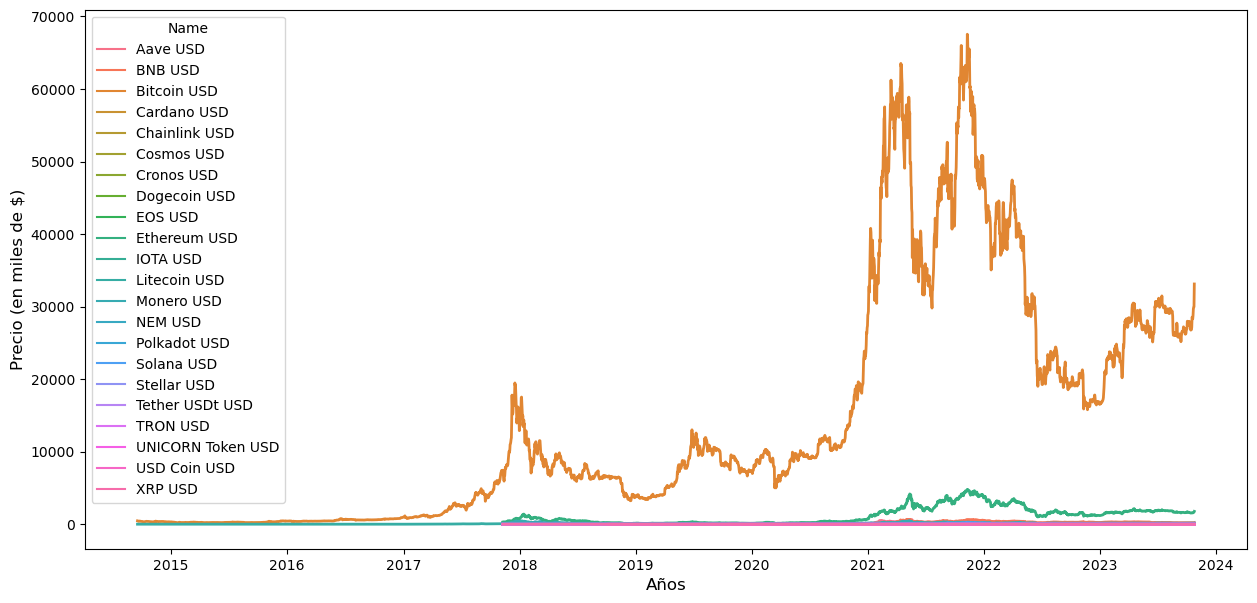

In [18]:
all_cryptos['Date'] = pd.to_datetime(all_cryptos['Date']) 

plt.figure(figsize=(15,7))
sns.lineplot(data=all_cryptos,
             x="Date",
             y="Open",
             hue="Name",
            linewidth = 2)
plt.xlabel('Años', fontsize=12)
plt.ylabel('Precio (en miles de $)', fontsize=12)
#plt.ylim(0,1000)

<Axes: xlabel='Date', ylabel='Open'>

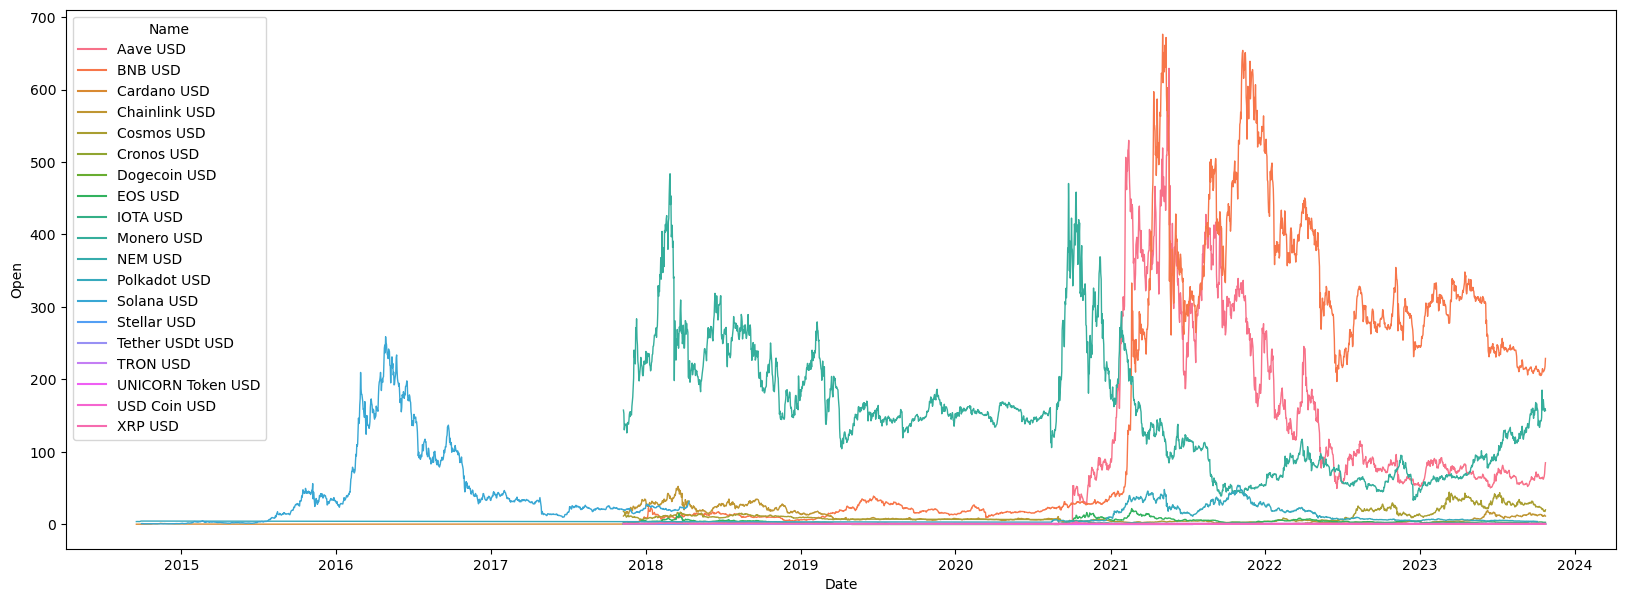

In [19]:
#Quitamos BTC y ETH ya que en este dataset son outliers y LITECOIN (LTC) ya que esta moneda al tener un inicio temprano dificultad bien la visualizacion del resto de criptos

plt.figure(figsize=(20,7))
sns.lineplot(data=all_cryptos_except,
             x="Date",
             y="Open",
             hue="Name",
            linewidth = 1)
#plt.ylim(0,300)

#Observamos que algunas como BNB (linea roja), AAVE(linea rosa) han tenido subidas bastantes alcistas, MONERO (azul oscuro) fue muy diferente
#Solana (azul clarito) tuvo un pico maximo en 2022

(0.0, 300.0)

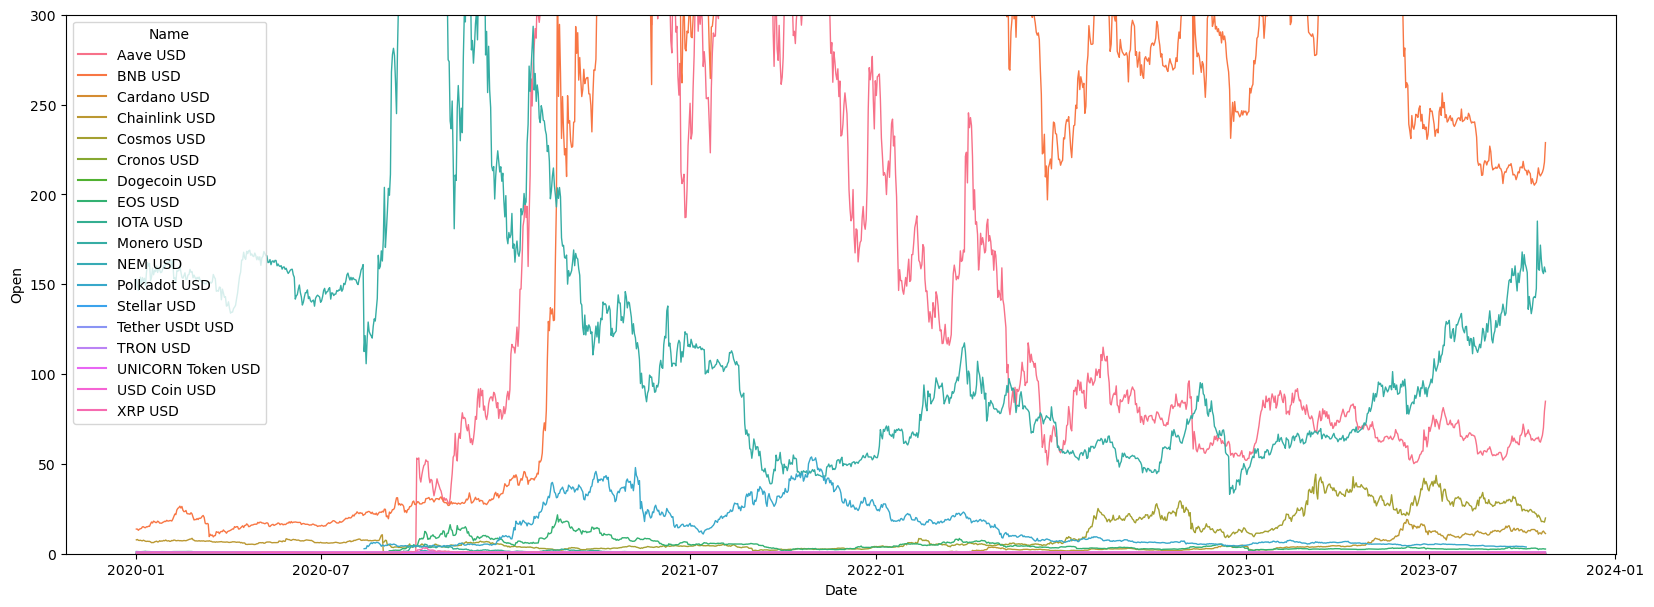

In [20]:
all_cryptos_except['Date'] = pd.to_datetime(all_cryptos_except['Date']) 

all_cryptos_except_2020 = all_cryptos_except[all_cryptos_except['Date'].dt.year >= 2020]

plt.figure(figsize=(20,7))
sns.lineplot(data=all_cryptos_except_2020,
             x="Date",
             y="Open",
             hue="Name",
            linewidth = 1)
plt.ylim(0,300)

#3 USAMOS LIBRERIA PARA CALCULAR VALORES RESTANTES DEL BTC

In [21]:
#La libreria permite entrar en la api de Binance y operar con facilidad en ellos para obtener datos historicos
exchange = ccxt.binance()
exchange.apiKey = 'kgwzWZbjkIS1ocCj6I2GoI9aC2BJp13FM9vJMWDFZ3RrXzb8WGMjgJtbBqN4qH4Z'
exchange.secret = 'd6D7UhEIiDD2fgNS1nLtG0TWeZBcpu97sAxphjSabr2GDZICvcu0DMZHrMOnqFv2'

# Símbolo para el par BTC/USDT
symbol = 'BTC/USDT'

# Función para obtener el precio diario de Bitcoin desde una fecha inicial
def fetch_historical_btc_prices(start_date, symbol='BTC/USDT'):
    start_timestamp = int(datetime.datetime.timestamp(start_date)) * 1000
    end_timestamp = exchange.milliseconds()  # Tiempo actual en milisegundos
    timeframe = '1d'  # Intervalo diario

    # Lista para almacenar los datos de precios
    historical_data = []

    while start_timestamp < end_timestamp:
        try:
            # Obtener datos de velas (OHLCV) para el intervalo de tiempo actual
            ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=start_timestamp, limit=1000)
            if len(ohlcv) == 0:
                break  # No hay más datos disponibles

            # Agregar datos al historial
            historical_data.extend(ohlcv)

            # Actualizar el inicio para la siguiente solicitud (último timestamp + 1)
            start_timestamp = ohlcv[-1][0] + exchange.parse_timeframe(timeframe) * 1000

            # Dormir un poco para no exceder el límite de la API
            time.sleep(exchange.rateLimit / 1000)

        except (ccxt.ExchangeError, ccxt.NetworkError) as error:
            print(f"Error al obtener datos: {error}")
            break

    return historical_data

# Obtener datos históricos desde la fecha de creación de Bitcoin (2009-01-03)
start_date = datetime.datetime(2009, 1, 3)
historical_data = fetch_historical_btc_prices(start_date, symbol)

# Convertir los datos en un DataFrame de pandas
def create_dataframe(data):
    if data:
        df = pd.DataFrame(data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
        # Convertir la columna 'timestamp' a formato de fecha y hora
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
        return df
    else:
        return None

# Crear DataFrame a partir de los datos históricos obtenidos
btc_df = create_dataframe(historical_data)

# Imprimir el DataFrame
if btc_df is not None:
    print(btc_df.head())  # Mostrar las primeras filas del DataFrame
else:
    print("No se han encontrado datos históricos.")

   timestamp     open     high      low    close       volume
0 2017-08-17  4261.48  4485.39  4200.74  4285.08   795.150377
1 2017-08-18  4285.08  4371.52  3938.77  4108.37  1199.888264
2 2017-08-19  4108.37  4184.69  3850.00  4139.98   381.309763
3 2017-08-20  4120.98  4211.08  4032.62  4086.29   467.083022
4 2017-08-21  4069.13  4119.62  3911.79  4016.00   691.743060


<Axes: xlabel='Date', ylabel='Open'>

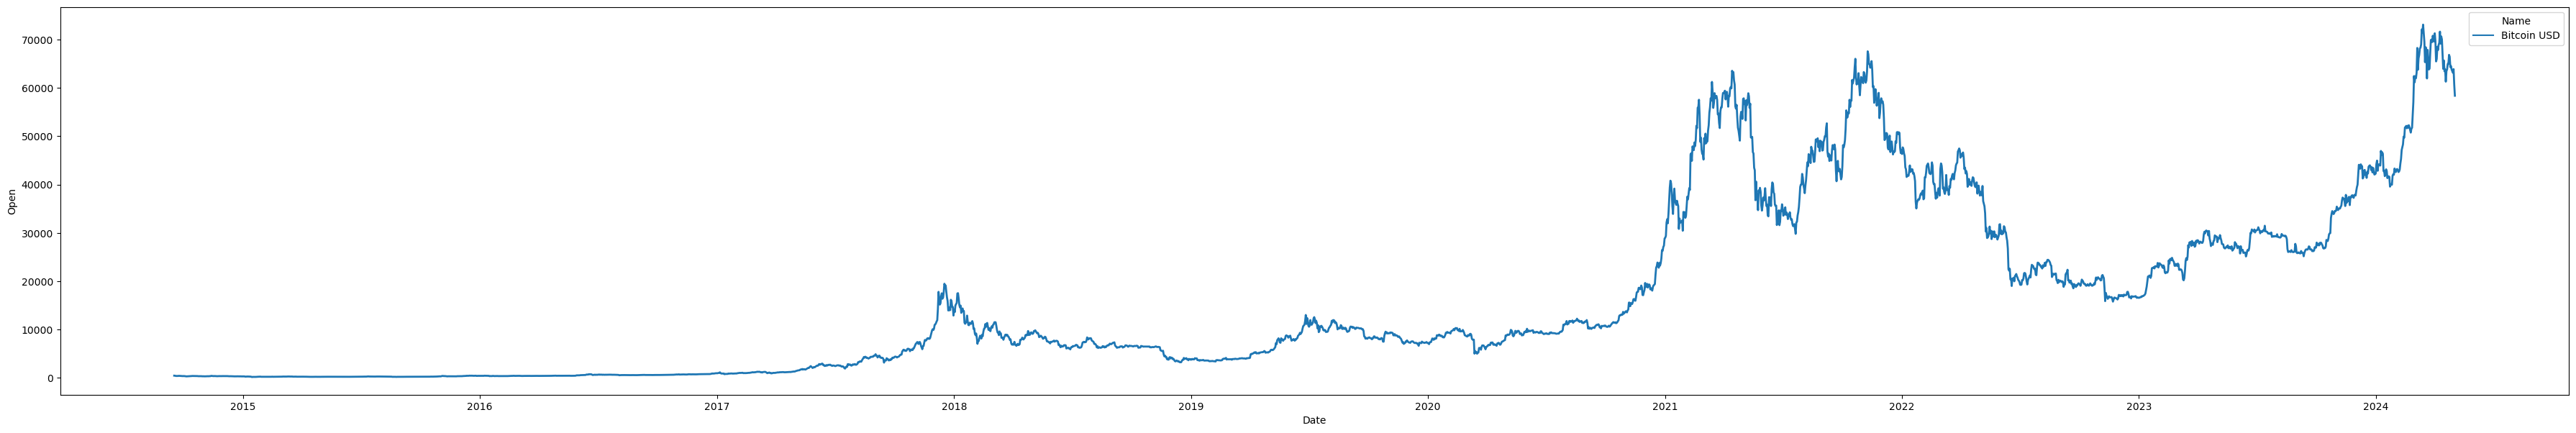

In [22]:
btc_df['timestamp'] = pd.to_datetime(btc_df['timestamp']) 

fecha_inicio = pd.to_datetime('2023-10-25')

# Filtra el DataFrame para obtener solo las filas dentro del rango de fechas
BTCX = btc_df[(btc_df['timestamp'] >= fecha_inicio)]

#Cambiamos nombres de columnas porque no coinciden las que nos interesan
nuevos_nombres = {'open': 'Open', 'timestamp': 'Date', 'high': 'High','low': 'Low', 'close': 'Close', 'volume': 'Volume'}
BTCX = BTCX.rename(columns=nuevos_nombres)

#Concateno para que este todo en un df
BTC1 = pd.concat([BTC,BTCX], ignore_index=True)
BTC1['Name'] = 'Bitcoin USD'


BTC1['Date'] = pd.to_datetime(BTC1['Date']) 

plt.figure(figsize=(45,7))
sns.lineplot(data=BTC1,
             x="Date",
             y="Open",
             hue="Name",
            linewidth = 2)
#plt.ylim(0,1000)

#BTC.max()

In [23]:
exchange = ccxt.binance()
exchange.apiKey = 'kgwzWZbjkIS1ocCj6I2GoI9aC2BJp13FM9vJMWDFZ3RrXzb8WGMjgJtbBqN4qH4Z'
exchange.secret = 'd6D7UhEIiDD2fgNS1nLtG0TWeZBcpu97sAxphjSabr2GDZICvcu0DMZHrMOnqFv2'

# Símbolo para el par ETH/USDT
symbol = 'ETH/USDT'

# Función para obtener el precio diario de Bitcoin desde una fecha inicial
def fetch_historical_eth_prices(start_date, symbol='ETH/USDT'):
    start_timestamp = int(datetime.datetime.timestamp(start_date)) * 1000
    end_timestamp = exchange.milliseconds()  # Tiempo actual en milisegundos
    timeframe = '1d'  # Intervalo diario

    # Lista para almacenar los datos de precios
    historical_data = []

    while start_timestamp < end_timestamp:
        try:
            # Obtener datos de velas (OHLCV) para el intervalo de tiempo actual
            ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=start_timestamp, limit=1000)
            if len(ohlcv) == 0:
                break  # No hay más datos disponibles

            # Agregar datos al historial
            historical_data.extend(ohlcv)

            # Actualizar el inicio para la siguiente solicitud (último timestamp + 1)
            start_timestamp = ohlcv[-1][0] + exchange.parse_timeframe(timeframe) * 1000

            # Dormir un poco para no exceder el límite de la API
            time.sleep(exchange.rateLimit / 1000)

        except (ccxt.ExchangeError, ccxt.NetworkError) as error:
            print(f"Error al obtener datos: {error}")
            break

    return historical_data

# Obtener datos históricos desde la fecha de creación de Bitcoin (2009-01-03)
start_date = datetime.datetime(2009, 1, 3)
historical_data = fetch_historical_eth_prices(start_date, symbol)

# Convertir los datos en un DataFrame de pandas
def create_dataframe(data):
    if data:
        df = pd.DataFrame(data, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
        # Convertir la columna 'timestamp' a formato de fecha y hora
        df['Date'] = pd.to_datetime(df['Date'], unit='ms')
        return df
    else:
        return None

# Crear DataFrame a partir de los datos históricos obtenidos
eth_df = create_dataframe(historical_data)

<Axes: xlabel='Date', ylabel='Open'>

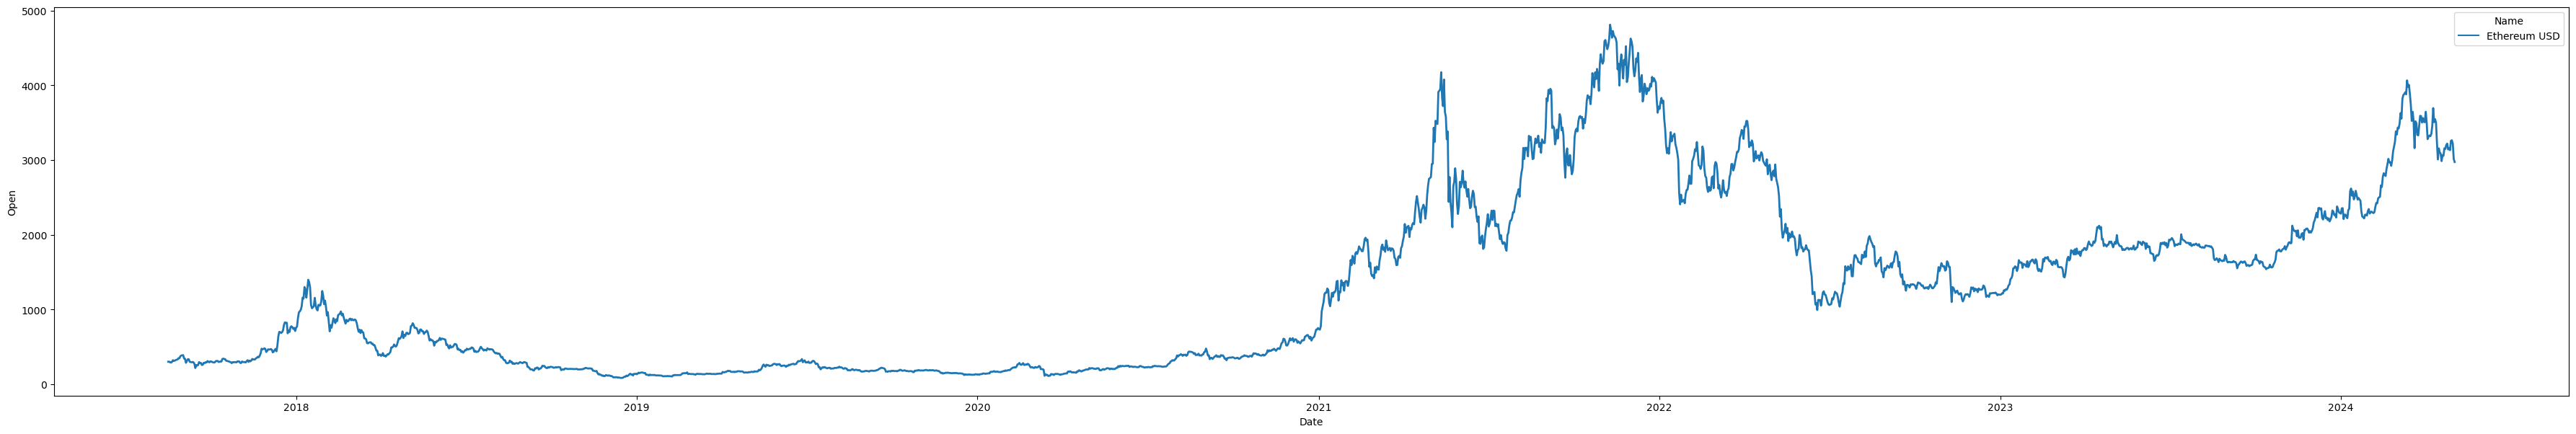

In [24]:
eth_df['Date'] = pd.to_datetime(eth_df['Date']) 

fecha_inicio = pd.to_datetime('2023-10-25')

# Filtra el DataFrame para obtener solo las filas dentro del rango de fechas
ETHX = eth_df[(eth_df['Date'] >= fecha_inicio)]

#Consigo los datos iniciales
fecha_inicial = pd.to_datetime('2017-11-08')

# Filtra el DataFrame para obtener solo las filas dentro del rango de fechas
ETHY = eth_df[(eth_df['Date'] <= fecha_inicial)]

#Concateno para que este todo en un df
ETH1 = pd.concat([ETH,ETHX,ETHY], ignore_index=True)
ETH1['Name'] = 'Ethereum USD'


ETH1['Date'] = pd.to_datetime(ETH1['Date']) 

plt.figure(figsize=(45,7))
sns.lineplot(data=ETH1,
             x="Date",
             y="Open",
             hue="Name",
            linewidth = 2)
#plt.ylim(0,1000)

#ETH.max()

In [25]:
exchange = ccxt.binance()
exchange.apiKey = 'kgwzWZbjkIS1ocCj6I2GoI9aC2BJp13FM9vJMWDFZ3RrXzb8WGMjgJtbBqN4qH4Z'
exchange.secret = 'd6D7UhEIiDD2fgNS1nLtG0TWeZBcpu97sAxphjSabr2GDZICvcu0DMZHrMOnqFv2'

# Símbolo para el par LTC/USDT
symbol = 'LTC/USDT'

# Función para obtener el precio diario de Bitcoin desde una fecha inicial
def fetch_historical_ltc_prices(start_date, symbol='LTC/USDT'):
    start_timestamp = int(datetime.datetime.timestamp(start_date)) * 1000
    end_timestamp = exchange.milliseconds()  # Tiempo actual en milisegundos
    timeframe = '1d'  # Intervalo diario

    # Lista para almacenar los datos de precios
    historical_data = []

    while start_timestamp < end_timestamp:
        try:
            # Obtener datos de velas (OHLCV) para el intervalo de tiempo actual
            ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=start_timestamp, limit=1000)
            if len(ohlcv) == 0:
                break  # No hay más datos disponibles

            # Agregar datos al historial
            historical_data.extend(ohlcv)

            # Actualizar el inicio para la siguiente solicitud (último timestamp + 1)
            start_timestamp = ohlcv[-1][0] + exchange.parse_timeframe(timeframe) * 1000

            # Dormir un poco para no exceder el límite de la API
            time.sleep(exchange.rateLimit / 1000)

        except (ccxt.ExchangeError, ccxt.NetworkError) as error:
            print(f"Error al obtener datos: {error}")
            break

    return historical_data

# Obtener datos históricos desde la fecha de creación de Bitcoin (2009-01-03)
start_date = datetime.datetime(2009, 1, 3)
historical_data = fetch_historical_ltc_prices(start_date, symbol)

# Convertir los datos en un DataFrame de pandas
def create_dataframe(data):
    if data:
        df = pd.DataFrame(data, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
        # Convertir la columna 'timestamp' a formato de fecha y hora
        df['Date'] = pd.to_datetime(df['Date'], unit='ms')
        return df
    else:
        return None

# Crear DataFrame a partir de los datos históricos obtenidos
ltc_df = create_dataframe(historical_data)

<Axes: xlabel='Date', ylabel='Open'>

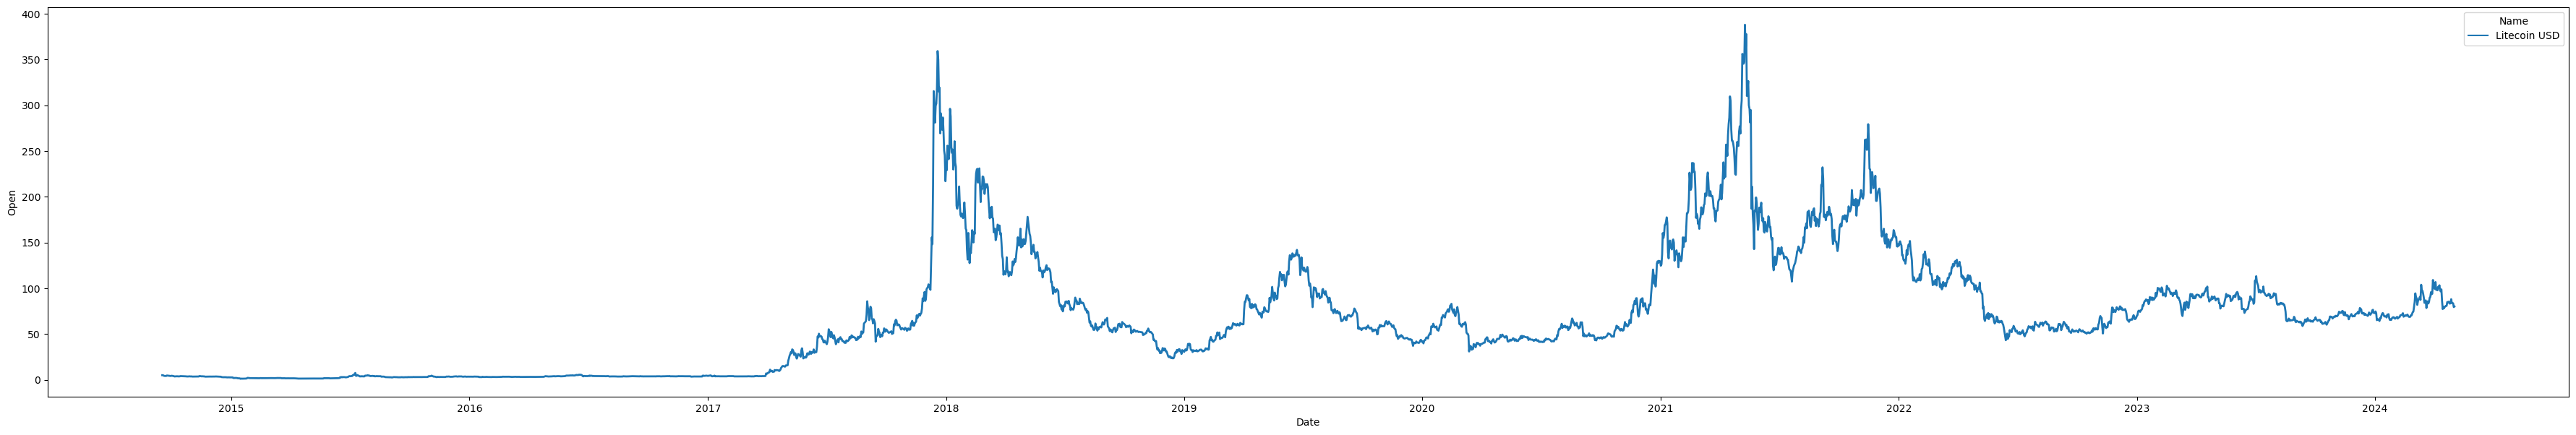

In [26]:
ltc_df['Date'] = pd.to_datetime(ltc_df['Date']) 

fecha_inicio = pd.to_datetime('2023-10-25')

# Filtra el DataFrame para obtener solo las filas dentro del rango de fechas
LTCX = ltc_df[(ltc_df['Date'] >= fecha_inicio)]


#Concateno para que este todo en un df
LTC1 = pd.concat([LTC,LTCX], ignore_index=True)
LTC1['Name'] = 'Litecoin USD'


LTC1['Date'] = pd.to_datetime(LTC1['Date']) 

plt.figure(figsize=(45,7))
sns.lineplot(data=LTC1,
             x="Date",
             y="Open",
             hue="Name",
            linewidth = 2)
#plt.ylim(0,2000)

.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


In [27]:
from datetime import datetime

exchange = ccxt.binance({
    'apiKey': 'kgwzWZbjkIS1ocCj6I2GoI9aC2BJp13FM9vJMWDFZ3RrXzb8WGMjgJtbBqN4qH4Z',  # Reemplaza con tu propia API key
    'secret': 'd6D7UhEIiDD2fgNS1nLtG0TWeZBcpu97sAxphjSabr2GDZICvcu0DMZHrMOnqFv2',  # Reemplaza con tu propio secret
    'enableRateLimit': True  # Importante para respetar los límites de la API y evitar baneos
})

# Asegurarse de que los mercados están cargados
exchange.load_markets()

# Seleccionar el par y el timeframe
symbol = 'BTC/USDT'
timeframe = '1d'  # Puedes cambiar esto por '1m', '5m', '1h', '1d', etc.

# Calcular el timestamp de inicio, por ejemplo, para los últimos días
since = exchange.parse8601('2023-04-20T00:00:00Z')

# Obtener datos históricos
# Nota: El limite puede variar, y puede ser necesario paginar para grandes rangos de tiempo
limit = 1000  # Cambia este valor según necesites
data = exchange.fetch_ohlcv(symbol, timeframe, since, limit)

# Formatear e imprimir los resultados
print(f'{"Fecha":<20} {"Apertura":<10} {"Máximo":<10} {"Mínimo":<10} {"Cierre":<10} {"Volumen":<10}')
for candle in data:
    date = datetime.utcfromtimestamp(candle[0] / 1000).strftime('%Y-%m-%d %H:%M:%S')
    open_price, high, low, close, volume = candle[1], candle[2], candle[3], candle[4], candle[5]
    print(f'{date:<20} {open_price:<10} {high:<10} {low:<10} {close:<10} {volume:<10}')


Fecha                Apertura   Máximo     Mínimo     Cierre     Volumen   
2023-04-20 00:00:00  28797.1    29088.3    28010.0    28243.65   76879.09372
2023-04-21 00:00:00  28243.65   28374.02   27125.0    27262.84   77684.7679
2023-04-22 00:00:00  27262.84   27882.72   27140.35   27816.85   36023.69686
2023-04-23 00:00:00  27816.85   27816.85   27311.25   27590.6    34812.09581
2023-04-24 00:00:00  27590.59   28000.0    26942.82   27510.93   53111.56874
2023-04-25 00:00:00  27510.93   28399.99   27192.0    28300.79   52325.14637
2023-04-26 00:00:00  28300.8    30036.0    27235.0    28415.29   129228.40403
2023-04-27 00:00:00  28415.29   29890.0    28378.86   29472.77   95430.82431
2023-04-28 00:00:00  29472.77   29599.54   28891.0    29311.7    54298.16578
2023-04-29 00:00:00  29311.69   29448.88   29031.0    29230.45   20466.83058
2023-04-30 00:00:00  29230.45   29969.39   29079.59   29233.21   39752.5372
2023-05-01 00:00:00  29233.2    29337.34   27666.95   28068.26   64433.65958
2